In [2]:
# %matplotlib nbagg
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patch
from matplotlib.patches import Polygon

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

import pandas as pd

import numpy as np
import scipy as sp
# import scipy.optimize 
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.misc import face
from scipy import interpolate

import glob
import csv
import re
import sys 
import os
import copy
import time
import h5py
import skimage.feature
import skimage.filters
import skimage.measure
import socket  
import itertools
from tqdm.notebook import tqdm as tqdm

from IPython.display import display, clear_output, Markdown
from PIL import Image, ImageOps

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

import cv2

udir = '/cds/home/d/diegotur/UED/'

if udir not in sys.path:
    sys.path.append(udir)

import ued_dt3 as ued_dt
try:
    import pyFAI, pyFAI.detectors
    from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
except:
    print('No pyFAI library found. If you want to do azimuthal integrations - install it!')

import dt_functions as dt


ModuleNotFoundError: No module named 'dt_functions'

In [ ]:
data_path = [
    ## Sample Reid#3 7nm NPs 
      '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_2021/',  #   Reid#3, Fluence = 4 mJ/cm^2 (diffuse) run 20  (4.5 hours)
      '/cds/group/ued/data/ueduu0701/FePt/20190715/Run/20190715_0252/',  #   Reid#3, Fluence = 4 mJ/cm^2 (diffuse) run ???  )

]


#manually picked ROIs. otherwise can be picked on the images
roinames = ['100', '010', '-100', '0-10']

# ##ROI COORDS FOR REID#3 (scans up to scan 11  )
roicoord = [
    [425.719203896629, 447.27946659749034],
    [566.5981163772879, 466.7329921805848],
    [549.3065779277509, 611.0787981335249],
    [408.2835757825091, 589.498444929509]
    ]
#create diffraction object
dif = ued_dt.diffraction(sample = 'FePt 6-1 16nm', data_path = data_path, roisize=40, maxorder = '550', roicoord=roicoord, roinames = roinames, a_reference=0.336, noscans=False, skipnimages=0, plot_width=15)

# try:
#     #prepare everything for azimuthal integration
#     dif.initialize_pyFAI(pixelsize=13e-6, sample_to_detector=7.7, e_energy=2e6, wl_correction=122.03 )
# except:
#     print ('AI doesn\'t work'),

dif.exposure = 6.
dif.gain = 65.


### Delete corrupted image ( and it's I0)
corruped_image_fname =   '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_2021//scan074/images-ANDOR1/ANDOR1_longDelay-010-273.37897900_0001.tif'
corruped_image_fnameI0 = '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_2021//scan074/I0/ANDOR2_longDelay-011-273.3790_20190714_073149.502110_0001.tif'
# corruped_image_fnameI0 = '/cds/group/ued/data/ueduu0701/FePt/20190713/Run/20190713_2021//scan074/I0/ANDOR2_longDelay-010-273.3940_20190714_073134.576158_0001.tif'
idx_delete = np.where(dif.fnames == corruped_image_fname)

dif.fnames = np.delete(dif.fnames,idx_delete)
dif.fnames_I0 = np.delete(dif.fnames_I0,idx_delete)


## Import the already binned file

In [3]:
import pickle 
     
with open('/cds/home/d/diegotur/UED/FePt/fast_load_Reid3/saved_dif.pkl', 'rb') as f:
    dif = pickle.load(f)

(-2.0, 8.0)

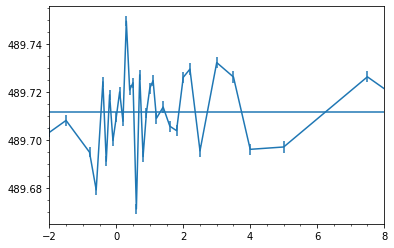

In [4]:
# center moving over time 
plt.errorbar(dif.bincenters, dif.centerpos_time[:,0], yerr =  dif.centers_time_errors[:,0] )
plt.axhline(dif.centerpos_time[:,0].mean())
plt.xlim(-2,8)